In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import colors as mcolors
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
import pandas as pd
import sklearn as sk
from xgboost import XGBClassifier
from sklearn.preprocessing.imputation import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

In [2]:
data_folder = "/Users/youssefberrada/Documents/GitHub/PLAsTiCC-Astronomical-Classification/data/class_data/"
training_dataset = pd.read_csv(data_folder+'full_train.csv')

In [3]:
test_dataset = pd.read_csv(data_folder+'full_test.csv')

In [7]:
data = training_dataset.append(pd.DataFrame(data = test_dataset), ignore_index=True)

In [9]:
# separate labels
Y = data['target']
Y.head()

0    88
1    42
2    90
3    90
4    65
Name: target, dtype: int64

In [10]:
# separate training values (exclude labels and object_id)
X = data.drop(['target'], axis=1)
X.head()

,flux_min,flux_max,flux_mean,flux_median,flux_std,flux_skew,flux_err_min,flux_err_max,flux_err_mean,flux_err_median,...,4__kurtosis,4__skewness,"5__fft_coefficient__coeff_0__attr_""abs""","5__fft_coefficient__coeff_1__attr_""abs""",5__kurtosis,5__skewness,mjd_diff_det,hostgal_photoz,hostgal_photoz_err,mwebv
0,-14.735178,14.770886,-1.423351,-0.873033,6.471144,0.014989,0.639458,9.115748,2.359620,1.998217,...,-1.190245,-0.064134,100.473776,143.963093,-0.797047,0.218182,846.8017,1.6267,0.2552,0.007
1,-19.159811,47.310059,2.267434,0.409172,8.022239,3.177854,0.695106,11.281384,2.471061,1.990851,...,6.081065,2.537802,231.509177,199.286370,3.583130,1.680352,78.7737,0.2262,0.0157,0.021
2,-15.494463,220.795212,8.909206,1.035895,27.558208,4.979826,0.567170,55.892746,2.555576,1.819875,...,13.747434,3.476420,591.037583,523.503586,12.134629,3.170857,123.6872,0.2813,1.1523,0.007
3,-16.543753,143.600189,7.145702,1.141288,20.051722,4.406298,0.695277,11.383690,2.753004,2.214853,...,16.377058,3.904008,393.114268,357.907185,14.434470,3.657305,133.9113,0.2415,0.0176,0.024
4,-12.695161,71.678154,0.367212,0.208109,4.962633,9.125056,0.720329,11.554160,2.596891,2.024408,...,3.266776,0.247423,25.692383,78.643093,1.290034,0.535841,691.9633,0.0000,0.0000,0.020


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import time
models = {"Logistic\nRegression": LogisticRegression(), "Decision\nTree\nClassifier": DecisionTreeClassifier(), 
          "K\nNeighbors\nClassifier": KNeighborsClassifier(), "Linear\nDiscriminant\nAnalysis": LinearDiscriminantAnalysis(),
          "Gaussian\nNB": GaussianNB(), "SVC": SVC(probability=True), "Ada\nBoost\nClassifier": AdaBoostClassifier(), 
          "Gradient\nBoosting\nClassifier": GradientBoostingClassifier(), "Random\nForest\nClassifier": RandomForestClassifier(),
          "Extra\nTrees\nClassifier": ExtraTreesClassifier(), "XGB\nClassifier": XGBClassifier()}
          #"LGBM\nClassifier": LGBMClassifier()}
#models_score = pd.DataFrame(columns=["Model", "Mean", "Std", "Time"], data=np.zeros((len(models),4)))
for i, (name, model) in enumerate(models.items()):
    clf = make_pipeline(StandardScaler(), model)
    # perform cross validation (compute mean and std from 5 random treinings and predictions per algorithm)
    # scoring -> neg_log_loss (closer to 0 is better)
    # explenation of log_loss
    # https://stackoverflow.com/questions/35013822/log-loss-output-is-greater-than-1
    start = time.time()
    scores = cross_val_score(clf, X.values, Y, cv=10, scoring="neg_log_loss", n_jobs=-1)
    end = time.time()
    print("Log Loss: {:0.2f} (+/- {:0.2f}) Model: {} Elapsed time: {}".format(scores.mean(), scores.std() * 2, name, end-start))
    # store results in dataframe
    models_score2["Model"][i+1] = name
    models_score2["Mean"][i+1] = scores.mean()
    models_score2["Std"][i+1] = scores.std()
    models_score2["Time"][i+1] = end-start

Log Loss: -1.02 (+/- 0.09) Model: Logistic
Regression Elapsed time: 20.824413061141968
Log Loss: -12.05 (+/- 1.58) Model: Decision
Tree
Classifier Elapsed time: 1.5751349925994873
Log Loss: -5.77 (+/- 0.53) Model: K
Neighbors
Classifier Elapsed time: 1.8305048942565918
Log Loss: -1.44 (+/- 0.18) Model: Linear
Discriminant
Analysis Elapsed time: 0.7495768070220947
Log Loss: -17.79 (+/- 2.73) Model: Gaussian
NB Elapsed time: 0.17838501930236816
Log Loss: -0.93 (+/- 0.08) Model: SVC Elapsed time: 43.44278311729431
Log Loss: -1.89 (+/- 0.11) Model: Ada
Boost
Classifier Elapsed time: 6.347151041030884
Log Loss: -0.69 (+/- 0.09) Model: Gradient
Boosting
Classifier Elapsed time: 163.2610628604889
Log Loss: -2.55 (+/- 0.65) Model: Random
Forest
Classifier Elapsed time: 1.3917019367218018
Log Loss: -2.87 (+/- 0.64) Model: Extra
Trees
Classifier Elapsed time: 0.7038781642913818
Log Loss: -0.68 (+/- 0.09) Model: XGB
Classifier Elapsed time: 117.62636113166809


In [69]:
models_score2

,Model,Mean,Std,Time
0,LGBM\nClassifier,-2.153052,4.329389,53.602829
1,Logistic\nRegression,-1.021495,0.044505,20.824413
2,Decision\nTree\nClassifier,-12.051336,0.790376,1.575135
3,K\nNeighbors\nClassifier,-5.766395,0.267356,1.830505
4,Linear\nDiscriminant\nAnalysis,-1.438029,0.089379,0.749577
5,Gaussian\nNB,-17.790678,1.363069,0.178385
6,SVC,-0.931455,0.037771,43.442783
7,Ada\nBoost\nClassifier,-1.894759,0.057168,6.347151
8,Gradient\nBoosting\nClassifier,-0.691810,0.044852,163.261063
9,Random\nForest\nClassifier,-2.546312,0.323043,1.391702


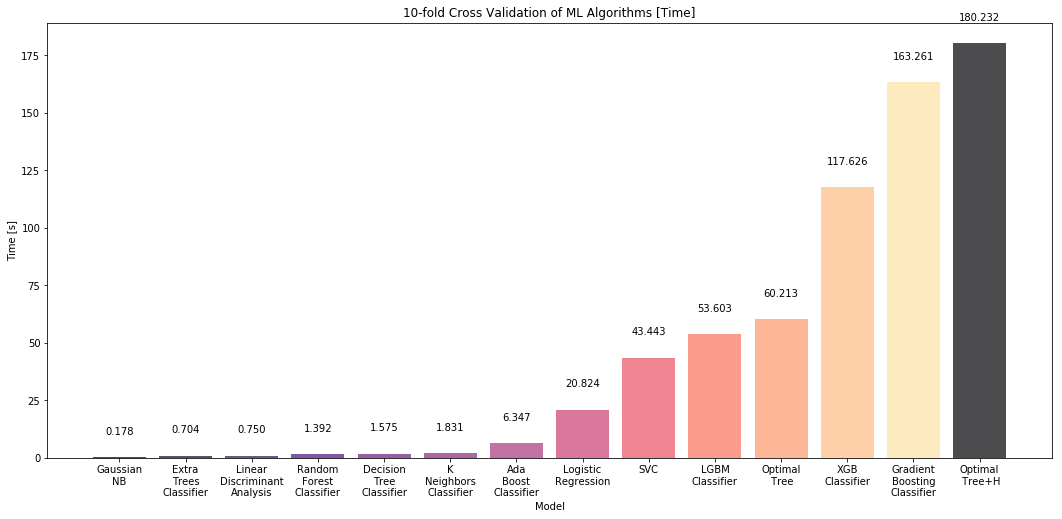

In [133]:
colors = plt.get_cmap('magma').colors[::20]
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.bar(models_score3.sort_values(by=['Time'])['Model'], models_score3.sort_values(by=['Time'])['Time'], color=colors, alpha=0.7)
ax.set_xlabel('Model')
ax.set_ylabel('Time [s]')
plt.title('10-fold Cross Validation of ML Algorithms [Time]')
for i, rect in enumerate(models_score3.sort_values(by=['Time'])['Time']):
    ax.text(i, rect+10, '{:.3f}'.format(rect), ha='center')

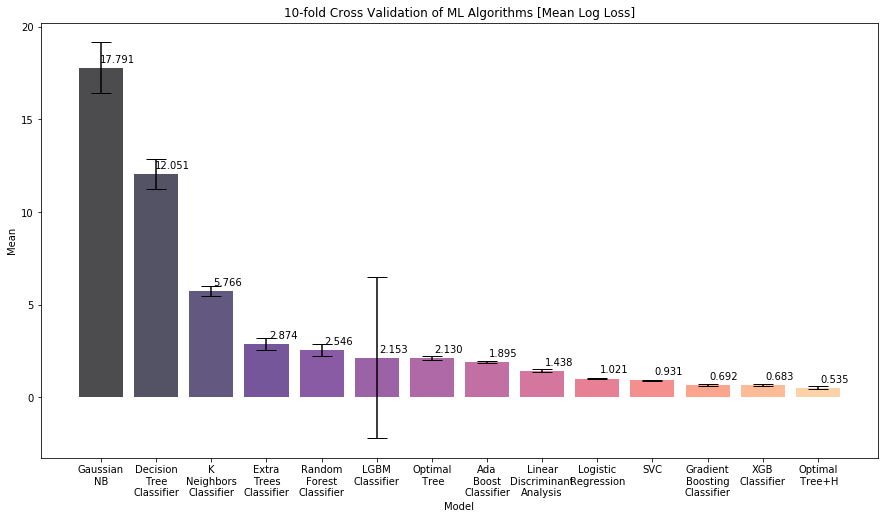

In [134]:
colors = plt.get_cmap('magma').colors[::17]
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.bar(models_score3.sort_values(by=['Mean'])['Model'], -models_score3.sort_values(by=['Mean'])['Mean'], color=colors, alpha=0.7, yerr=models_score3.sort_values(by=['Mean'])['Std'], capsize=10)
ax.set_xlabel('Model')
ax.set_ylabel('Mean')
plt.title('10-fold Cross Validation of ML Algorithms [Mean Log Loss]')
for i, rect in enumerate(models_score3.sort_values(by=['Mean'])['Mean']):
    ax.text(i+0.3, -rect+0.3, '{:.3f}'.format(-rect), ha='center')

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import time
models = {"LGBM\nClassifier": LGBMClassifier()}
models_score2 = pd.DataFrame(columns=["Model", "Mean", "Std", "Time"], data=np.zeros((13,4)))
for i, (name, model) in enumerate(models.items()):
    clf = make_pipeline(StandardScaler(), model)
    # perform cross validation (compute mean and std from 5 random treinings and predictions per algorithm)
    # scoring -> neg_log_loss (closer to 0 is better)
    # explenation of log_loss
    # https://stackoverflow.com/questions/35013822/log-loss-output-is-greater-than-1
    start = time.time()
    scores = cross_val_score(clf, X.values, Y, cv=10, scoring="neg_log_loss", n_jobs=-1)
    end = time.time()
    print("Log Loss: {:0.2f} (+/- {:0.2f}) Model: {} Elapsed time: {}".format(scores.mean(), scores.std() * 2, name, end-start))
    # store results in dataframe
    models_score2["Model"][i] = name
    models_score2["Mean"][i] = scores.mean()
    models_score2["Std"][i] = scores.std()
    models_score2["Time"][i] = end-start

Log Loss: -2.15 (+/- 8.66) Model: LGBM
Classifier Elapsed time: 53.60282897949219


In [49]:
models_score3 = models_score.copy() 
models_score3.iloc[0,1] = models_score2.iloc[0,1]
models_score3.iloc[0,2] = models_score2.iloc[0,2]
models_score3.iloc[0,3] = models_score2.iloc[0,3]

In [50]:
models_score3.iloc[0,]

Model    LGBM\nClassifier
Mean             -2.15305
Std               4.32939
Time               53.188
Name: 0, dtype: object

In [54]:
models_score = models_score3.copy()

In [131]:
models_score3["Model"][12] ='Optimal\n Tree'
models_score3["Mean"][12] = -2.13
models_score3["Std"][12] = 0.0932
models_score3["Time"][12] = 60.213

In [72]:
models_score3 = models_score2.copy()

In [93]:
models_score3 = models_score3.append(models_score3.iloc[12,])

In [132]:
models_score3["Model"][13] ='Optimal\n Tree+H'
models_score3["Mean"][13] = -0.53452
models_score3["Std"][13] = 0.074565345
models_score3["Time"][13] = 180.23234

In [121]:
models_score3["Model"][13] ='Optimal\n Tree+H'

In [99]:
models_score3["Model"][13]

'Optimal\n Tree+H'

In [110]:
models_score3 = models_score3.reset_index(drop=True)

In [124]:
models_score3

,Model,Mean,Std,Time
0,LGBM\nClassifier,-2.153052,4.329389,53.602829
1,Logistic\nRegression,-1.021495,0.044505,20.824413
2,Decision\nTree\nClassifier,-12.051336,0.790376,1.575135
3,K\nNeighbors\nClassifier,-5.766395,0.267356,1.830505
4,Linear\nDiscriminant\nAnalysis,-1.438029,0.089379,0.749577
5,Gaussian\nNB,-17.790678,1.363069,0.178385
6,SVC,-0.931455,0.037771,43.442783
7,Ada\nBoost\nClassifier,-1.894759,0.057168,6.347151
8,Gradient\nBoosting\nClassifier,-0.691810,0.044852,163.261063
9,Random\nForest\nClassifier,-2.546312,0.323043,1.391702
